<a href="https://colab.research.google.com/github/hanifkamil/mysite/blob/master/Tesla_%26_GameStop_Submission_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Tesla & GameStop Submission Project</h1>

<h2>Extracting and Visualizing Stock Data</h2>

In [ ]:
!pip install yfinance
!pip install pandas
!pip install plotly

In [ ]:
import yfinance as yf
import pandas as pd
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
from matplotlib import pyplot as plt

<h3>Question 1 - Extracting Tesla Stock Data Using yfinance</h3>

In [ ]:
tesla_data = yf.Ticker("TSLA")

In [ ]:
tesla_share_price_data = tesla_data.history(period="max")
tesla_share_price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2021-02-22,762.640015,768.500000,710.200012,714.500000,37011700,0,0.0
2021-02-23,662.130005,713.609985,619.000000,698.840027,66397000,0,0.0
2021-02-24,711.849976,745.000000,694.169983,742.020020,36677100,0,0.0


In [ ]:
tesla_share_price_data.reset_index(inplace=True)

In [ ]:
tesla_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


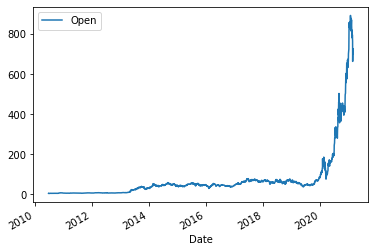

In [ ]:
tesla_share_price_data.plot(x="Date", y="Open")

In [ ]:
tesla_data.dividends

Series([], Name: Dividends, dtype: int64)

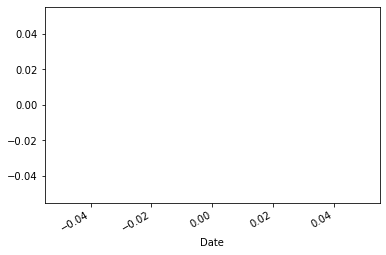

In [ ]:
tesla_data.dividends.plot()

<h2>Question 5: Plot Tesla Stock Graph</h2>

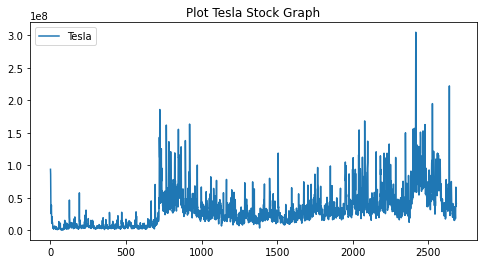

In [ ]:
tesla_share_price_data['Volume'].plot(label='Tesla',
    figsize=(8,4),title='Plot Tesla Stock Graph');
plt.legend();
plt.show()

<h1>================================================</h1>

In [ ]:
!pip install requests
!pip install bs4

In [ ]:
import numpy as np
import requests
from bs4 import BeautifulSoup

<h3>Question 2 - Extracting Tesla Revenue Data Using Webscraping</h3>

In [ ]:
url='https://finance.yahoo.com/quote/TSLA/history?p=TSLA'

In [ ]:
tesla_revenue  = requests.get(url).text

In [ ]:
soup = BeautifulSoup(tesla_revenue,"html5lib")

In [ ]:
table = soup.find_all('table')

In [ ]:
len(table)

1

In [ ]:
tesla_revenue = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date =col[0].text
    Open =col[1].text
    high =col[2].text
    low =col[3].text
    close =col[4].text
    adj_close =col[4].text
    volume =col[5].text
    
    tesla_revenue = tesla_revenue.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [ ]:
tesla_revenue.tail()

,index,Date,Open,High,Low,Close,Volume,Adj Close
95,95,"Oct 09, 2020",430.13,434.59,426.46,434.00,434.00,434.00
96,96,"Oct 08, 2020",438.44,439.00,425.30,425.92,425.92,425.92
97,97,"Oct 07, 2020",419.87,429.90,413.85,425.30,425.30,425.30
98,98,"Oct 06, 2020",423.79,428.78,406.05,413.98,413.98,413.98
99,99,"Oct 05, 2020",423.35,433.64,419.33,425.68,425.68,425.68


<h3>Tesla Revenue Dashboard</h3>

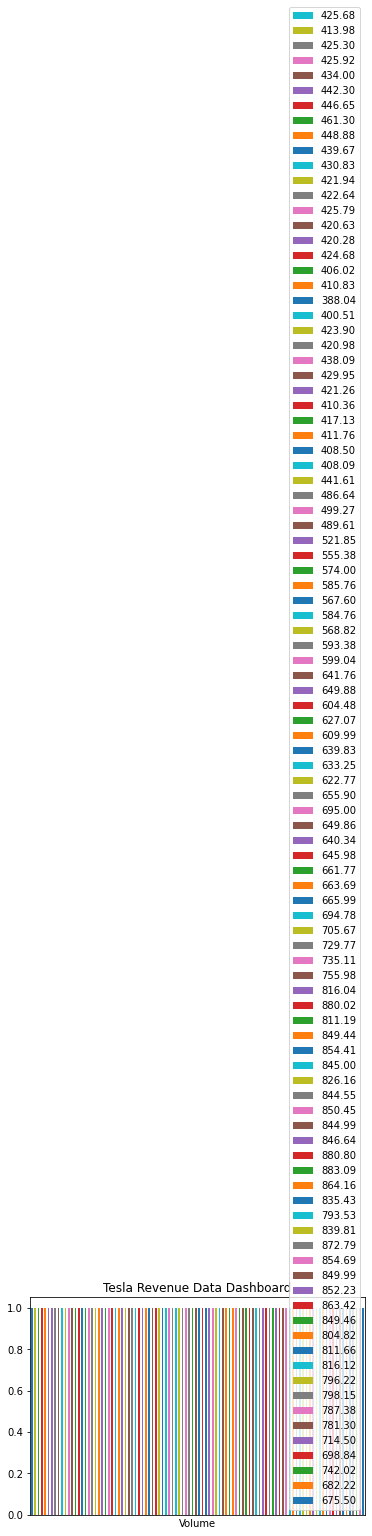

In [ ]:
tesla_revenue.assign(dummy = 1).groupby(
  ['Date','Volume']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Tesla Revenue Data Dashboard')

# other it'll show up as 'dummy' 
plt.xlabel('Volume')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(tesla_revenue['Volume'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

<h1>================================================</h1>

In [ ]:
import yfinance as yf

<h3>Question 3 - Extracting GameStop Stock Data Using yfinance</h3>

In [ ]:
gme_data = yf.Ticker("GME")

In [ ]:
gme_share_price_data = gme_data.history(period="max")
gme_share_price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0
...,...,...,...,...,...,...,...
2021-02-22,46.689999,48.509998,42.400002,46.000000,19338400,0.0,0.0
2021-02-23,44.970001,46.230000,40.000000,44.970001,7516000,0.0,0.0
2021-02-24,44.700001,91.709999,44.700001,91.709999,76315700,0.0,0.0


In [ ]:
gme_share_price_data.reset_index(inplace=True)

In [ ]:
gme_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


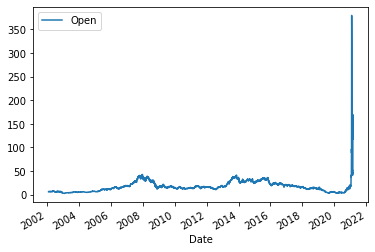

In [ ]:
gme_share_price_data.plot(x="Date", y="Open")

In [ ]:
gme_data.dividends

Date
2012-02-16    0.150
2012-05-24    0.150
2012-08-24    0.250
2012-11-26    0.250
2013-03-01    0.275
2013-05-31    0.275
2013-08-29    0.275
2013-12-02    0.275
2014-03-13    0.330
2014-06-02    0.330
2014-08-29    0.330
2014-11-21    0.330
2015-03-13    0.360
2015-06-08    0.360
2015-09-04    0.360
2015-12-01    0.360
2016-03-04    0.370
2016-06-06    0.370
2016-09-07    0.370
2016-11-29    0.370
2017-03-10    0.380
2017-06-05    0.380
2017-09-07    0.380
2017-11-30    0.380
2018-03-02    0.380
2018-06-11    0.380
2018-09-17    0.380
2018-12-10    0.380
2019-03-14    0.380
Name: Dividends, dtype: float64

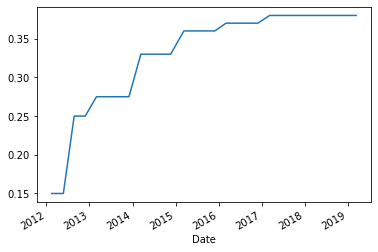

In [ ]:
gme_data.dividends.plot()

<h3>Question 6: Plot GameStop Stock Graph</h3>

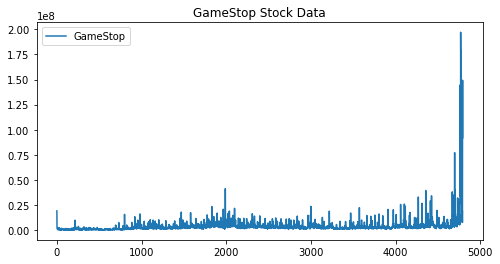

In [ ]:
gme_share_price_data['Volume'].plot(label='GameStop',
    figsize=(8,4),title='GameStop Stock Data');
plt.legend();
plt.show()

<h1>================================================</h1>

In [ ]:
import requests
from bs4 import BeautifulSoup

<h3>Question 4 - Extracting GameStop Revenue Data Using Webscraping</h3>

In [ ]:
url='https://finance.yahoo.com/quote/GME/history?p=GME'

In [ ]:
gme_revenue  = requests.get(url).text

In [ ]:
soup = BeautifulSoup(gme_revenue,"html5lib")

In [ ]:
table = soup.find_all('table')

In [ ]:
len(table)

1

In [ ]:
gme_revenue = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date =col[0].text
    Open =col[1].text
    high =col[2].text
    low =col[3].text
    close =col[4].text
    adj_close =col[4].text
    volume =col[5].text
    
    gme_revenue = gme_revenue.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [ ]:
gme_revenue.tail()

,index,Date,Open,High,Low,Close,Volume,Adj Close
95,95,"Oct 09, 2020",12.83,14.80,11.90,12.02,12.02,12.02
96,96,"Oct 08, 2020",9.54,13.64,9.19,13.49,13.49,13.49
97,97,"Oct 07, 2020",9.23,9.56,9.17,9.36,9.36,9.36
98,98,"Oct 06, 2020",9.56,9.84,9.10,9.13,9.13,9.13
99,99,"Oct 05, 2020",9.44,9.59,9.25,9.46,9.46,9.46


<h3>GameStop Revenue Dashboard</h3>

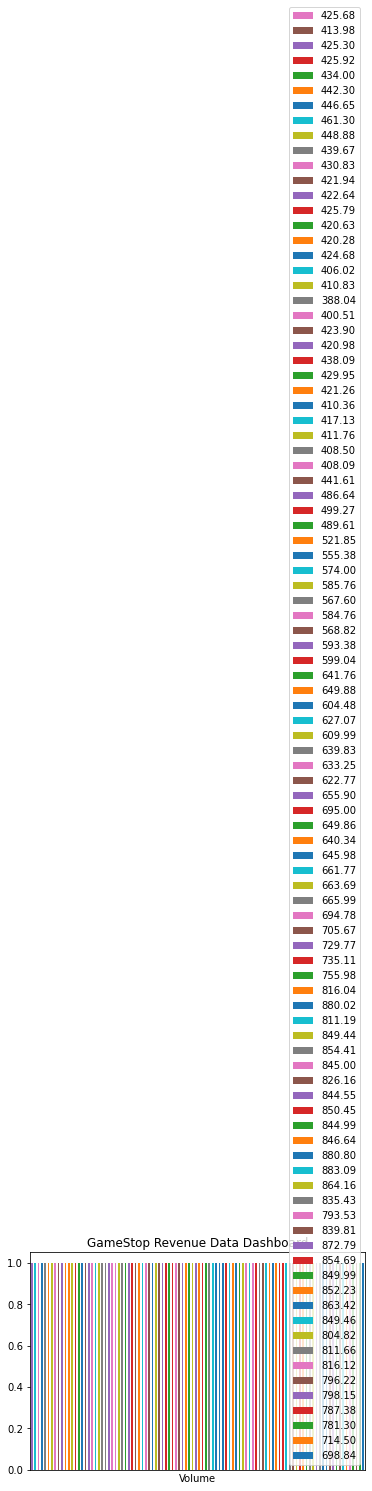

In [ ]:
gme_revenue.assign(dummy = 1).groupby(
  ['Date','Volume']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('GameStop Revenue Data Dashboard')

# other it'll show up as 'dummy' 
plt.xlabel('Volume')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(tesla_revenue['Volume'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

<h1>================================================</h1>